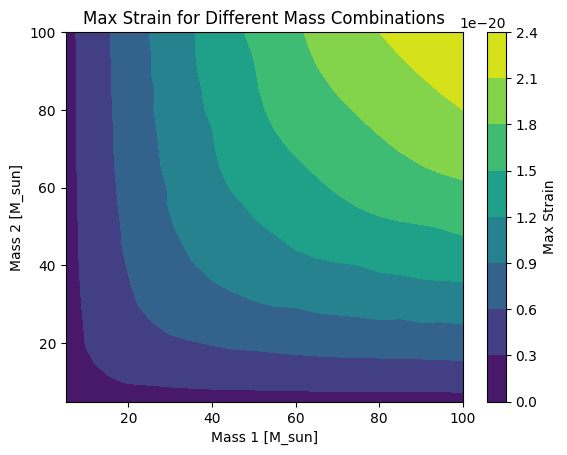

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pycbc.waveform import get_td_waveform

# Function to calculate max strain for given mass values
def max_strain(mass1, mass2, distance=100):
    # Generate the waveform
    hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                             mass1=mass1,
                             mass2=mass2,
                             distance=distance,
                             delta_t=1.0/4096,
                             f_lower=20)
    # Return the maximum strain (using numpy() to convert TimeSeries to ndarray)
    return np.max(np.abs(hp.numpy()))
    

# Generate mass grids for m1 and m2
mass1_values = np.linspace(5, 100, 20)  # Mass 1 range (solar masses)
mass2_values = np.linspace(5, 100, 20)  # Mass 2 range (solar masses)

# Initialize array to store max strains
strain_grid = np.zeros((len(mass1_values), len(mass2_values)))

# Calculate max strain for each mass combination
for i, m1 in enumerate(mass1_values):
    for j, m2 in enumerate(mass2_values):
        strain_grid[i, j] = max_strain(m1, m2)

# Plot the contour plot of max strain
X, Y = np.meshgrid(mass1_values, mass2_values)
plt.contourf(X, Y, strain_grid, cmap='viridis')
plt.colorbar(label='Max Strain')
plt.xlabel('Mass 1 [M_sun]')
plt.ylabel('Mass 2 [M_sun]')
plt.title('Max Strain for Different Mass Combinations')
plt.show()
